In [1]:
# https://blog.csdn.net/u013733326/article/details/79639509
# 搭建一个能够 识别猫 的简单的神经网络

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from lr_utils import load_dataset

In [3]:
train_x,train_y,test_x,test_y,classes = load_dataset()

In [4]:
train_x #包含209张 64x64x3的训练图片

array([[[[ 17,  31,  56],
         [ 22,  33,  59],
         [ 25,  35,  62],
         ...,
         [  1,  28,  57],
         [  1,  26,  56],
         [  1,  22,  51]],

        [[ 25,  36,  62],
         [ 28,  38,  64],
         [ 30,  40,  67],
         ...,
         [  1,  27,  56],
         [  1,  25,  55],
         [  2,  21,  51]],

        [[ 32,  40,  67],
         [ 34,  42,  69],
         [ 35,  42,  70],
         ...,
         [  1,  25,  55],
         [  0,  24,  54],
         [  1,  21,  51]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [5]:
train_x.shape

(209, 64, 64, 3)

In [6]:
train_y.shape  #209张训练图片的标签

(1, 209)

In [7]:
test_x

array([[[[158, 104,  83],
         [161, 106,  85],
         [162, 107,  84],
         ...,
         [170, 120, 100],
         [167, 121, 103],
         [172, 127, 109]],

        [[158, 103,  82],
         [160, 104,  82],
         [162, 105,  83],
         ...,
         [169, 118,  99],
         [164, 117,  98],
         [168, 121, 104]],

        [[158, 104,  82],
         [161, 105,  82],
         [162, 105,  83],
         ...,
         [173, 123, 102],
         [169, 122, 104],
         [168, 122, 104]],

        ...,

        [[102,  68,  52],
         [ 44,  31,  23],
         [ 28,  23,  20],
         ...,
         [163, 118, 102],
         [163, 120, 103],
         [166, 121, 105]],

        [[ 99,  67,  51],
         [ 38,  28,  22],
         [ 30,  26,  23],
         ...,
         [161, 117, 100],
         [164, 121, 104],
         [168, 123, 106]],

        [[127,  95,  72],
         [ 39,  29,  22],
         [ 30,  25,  22],
         ...,
         [165, 122, 105],
        

In [8]:
test_x.shape  #包含50张 64x64x3的测试图片

(50, 64, 64, 3)

In [9]:
test_y.shape  #50张测试图片的标签

(1, 50)

In [10]:
classes #保存的是以bytes类型保存的两个字符串数据，数据为：[b’non-cat’ b’cat’]

array([b'non-cat', b'cat'], dtype='|S7')

In [11]:
train_y[:,64]

array([0], dtype=int64)

train_y[:,64] = [0],it's a non-cat picture


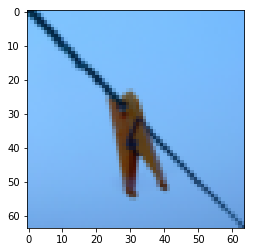

In [12]:
# 我们可以看一下我们加载的文件里面的图片都是些什么样子的
plt.imshow(train_x[64])
print("train_y[:,64] = "+ str(train_y[:,64]) + ",it's a "+classes[np.squeeze(train_y[:,64])].decode('utf-8')+" picture")

# 这里的np.squeeze()的作用是:从数组的形状中删除单维条目，即把shape中为1的维度去掉
# 因为train_y[:,64] = [0],所以想得到 0 ，就可以用np.squeeze()
# 当然我们也可以直接用train_y[0][26] 直接取到 0

train_y[26] is 0


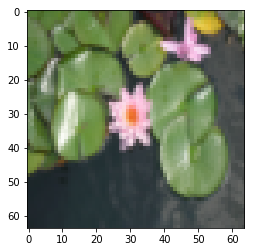

In [13]:
plt.imshow(train_x[26])
print("train_y[26] is "+str(train_y[0][26]))

train_y[:,25] = [1],it's a cat picture


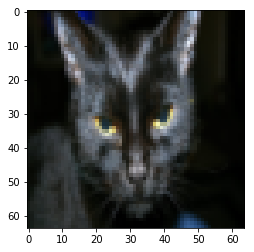

In [14]:
plt.imshow(train_x[25])
print("train_y[:,25] = "+ str(train_y[:,25]) + ",it's a "+classes[np.squeeze(train_y[:,25])].decode('utf-8')+" picture")  
#终于看到一只猫了，哈哈哈，还是好丑

In [15]:
# 为了方便，我们要把维度为（64，64，3）的numpy数组重新构造为（64 x 64 x 3，1）的数组，要乘以3的原因是每张图片是由64x64像素构成的，
# 而每个像素点由（R，G，B）三原色构成的，所以要乘以3。在此之后，我们的训练和测试数据集是一个numpy数组，【每 列 代表一个平坦的图像】 ，
#应该有m_train和m_test列。

In [16]:
# 当你想将形状（a，b，c，d）的矩阵X 平铺成形状（b * c * d，a）的矩阵X_flatten时，可以使用以下代码：
#X_flatten = X.reshape(X.shape [0]，-1).T   ＃X.T是X的转置

#将训练集的维度降低并转置。
train_x_flatten = train_x.reshape(train_x.shape[0],-1).T

#将测试集的维度降低并转置。
test_x_flatten = test_x.reshape(test_x.shape[0],-1).T

# 这一段意思是指把数组变为209行的矩阵（因为训练集里有209张图片），但是我懒得算列有多少，于是我就用-1告诉程序你帮我算，最后程序
# 算出来时12288列，我再最后用一个T表示转置，这就变成了12288行，209列。测试集亦如此。

In [17]:
print ("训练集降维最后的维度： " + str(train_x_flatten.shape))
print ("训练集_标签的维数 : " + str(train_y.shape))
print ("测试集降维之后的维度: " + str(test_x_flatten.shape))
print ("测试集_标签的维数 : " + str(test_y.shape))

训练集降维最后的维度： (12288, 209)
训练集_标签的维数 : (1, 209)
测试集降维之后的维度: (12288, 50)
测试集_标签的维数 : (1, 50)


In [18]:
# 为了表示彩色图像，必须为每个像素指定红色，绿色和蓝色通道（RGB），因此像素值实际上是从0到255范围内的三个数字的向量。机器学习中一个
# 常见的预处理步骤是对数据集进行居中和标准化，这意味着可以减去每个示例中整个numpy数组的(平均值)，然后将每个示例除以整个numpy数组的标准
# (偏差)。但对于(图片数据集)，它更简单，更方便，几乎可以将数据集的每一行除以255（像素通道的最大值），因为在RGB中不存在比255大的数据，
# 所以我们可以放心的除以255，让标准化的数据位于[0,1]之间，现在标准化我们的数据集：

train_x_std = train_x_flatten / 255
test_x_std = test_x_flatten / 255

In [19]:
train_x_std

array([[0.06666667, 0.76862745, 0.32156863, ..., 0.56078431, 0.08627451,
        0.03137255],
       [0.12156863, 0.75294118, 0.27843137, ..., 0.60784314, 0.09411765,
        0.10980392],
       [0.21960784, 0.74509804, 0.26666667, ..., 0.64705882, 0.09019608,
        0.20784314],
       ...,
       [0.        , 0.32156863, 0.54117647, ..., 0.33333333, 0.01568627,
        0.        ],
       [0.        , 0.31372549, 0.55294118, ..., 0.41960784, 0.01960784,
        0.        ],
       [0.        , 0.31764706, 0.55686275, ..., 0.58431373, 0.        ,
        0.        ]])

In [20]:
# 开始构建神经网络

In [21]:
# 建立神经网络的主要步骤是： 
# 1. 定义模型结构（例如输入特征的数量） 
# 2. 初始化模型的参数 
# 3. 循环（迭代次数）：
#     3.1 计算当前损失（正向传播）

#     3.2 计算当前梯度（反向传播）

#     3.3 更新参数（梯度下降）

In [22]:
# 现在构建sigmoid()，需要使用 sigmoid（w ^ T x + b） 计算来做出预测。

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [23]:
sigmoid(0)

0.5

In [24]:
sigmoid(9.2)

0.9998989708060922

In [25]:
# 既然sigmoid测试好了，我们现在就可以初始化我们需要的参数w和b了。
def init_w_b(dim):                 # dim = 64*64*3
    w = np.zeros(shape=(dim,1))
    b = 0
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

In [35]:
# 初始化参数的函数已经构建好了，现在就可以执行“前向”和“后向”传播步骤来学习参数。

# 我们现在要实现一个计算成本函数及其渐变的函数propagate（）
def propagate(w,b,X,Y):
    m = X.shape[1]       # m = 209
    
    # 正向传播
    A = sigmoid(np.dot(w.T,X) + b)        # A.shape = (1,209)
    cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    
    # 反向传播
    dw = (1 / m) * np.dot(X,(A - Y).T)  # dw.shape = (209,1)
    db = (1 / m) * np.sum(A - Y)
    
    #使用断言确保我的数据是正确的
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    #创建一个字典，把dw和db保存起来。
    grads = {
        'dw':dw,
        'db':db
    }
    
    return (grads,cost)

In [27]:
# 现在，我要使用渐变下降更新参数。目标是通过最小化成本函数J来学习 w和b。
def optimize(w , b , X , Y , num_iterations , learning_rate , print_cost = False):
    costs = []
    
    for i in range(num_iterations):
        
        grads,cost = propagate(w , b , X , Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # 记录成本
        if i % 100 == 0:
            costs.append(cost)
            
        # 打印成本
        if (print_cost) and (i % 100 == 0):
            print("迭代的次数:{} , 误差值:{}".format(i,cost))
            
    params = {
        "w":w,
        "b":b
    }
    
    grids = {
        'dw':dw,
        'db':db
    }
    
    return (params,grads,costs)
        

In [65]:
# optimize函数会输出已学习的w和b的值，我们可以使用w和b来预测数据集X的标签。现在我们要实现预测函数predict（）。

def predict(w , b , X ):
    m = X.shape[1] # 图片的数量209
    Y_predict = np.zeros(shape = (1,m))
#     w = w.reshape(X.shape[0],1)
    
    A = sigmoid(np.dot(w.T,X) + b)
    for i in range(m):
        #将概率a [0，i]转换为实际预测p [0，i]
        Y_predict[0,i] = 1 if A[0,i] > 0.5 else 0
    
    # 使用断言
    assert(Y_predict.shape == (1,m))
    
    return Y_predict

In [56]:
# 就目前而言，我们基本上把所有的东西都做完了，现在我们要把这些函数统统整合到一个model()函数中，
# 届时只需要调用一个model()就基本上完成所有的事了。

def model(X_train,Y_train , X_test , Y_test , num_iterations = 2000 , learning_rate = 0.5 , print_cost = False):
    # 样本数209
    m = X_train.shape[1]
    
    # 初始化参数
    w, b = init_w_b(X_train.shape[0])
    
    # 优化，迭代
    params,grads,costs = optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
    
    # 从params中得到最后的参数 w,b
    w = params["w"]
    b = params["b"]
    
    # 预测训练集/测试集的例子
    Y_predict_train = predict(w,b,X_train)
    Y_predict_test = predict(w,b,X_test)
    
    # 打印训练后的准确性
    print("训练集准确性:{}".format((m - (np.sum(np.abs(Y_predict_train - Y_train),axis = 1))) / m * 100) + "%")
    print("测试集准确性:{}".format((m - (np.sum(np.abs(Y_predict_test - Y_test),axis = 1))) / m * 100) + "%")
    
    d = {
            "costs" : costs,
            "Y_predict_test" : Y_predict_test,
            "Y_predict_train" : Y_predict_train,
            "w" : w,
            "b" : b,
            "learning_rate" : learning_rate,
            "num_iterations" : num_iterations }
    return d

In [66]:
print("====================测试model====================")     
#这里加载的是真实的数据，请参见上面的代码部分。
d = model(train_x_std, train_y, test_x_std, test_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

====================测试model====================
迭代的次数:0 , 误差值:0.6931471805599453
迭代的次数:100 , 误差值:0.5845083636993086
迭代的次数:200 , 误差值:0.46694904094655476
迭代的次数:300 , 误差值:0.37600686694802077
迭代的次数:400 , 误差值:0.3314632893282513
迭代的次数:500 , 误差值:0.30327306747438293
迭代的次数:600 , 误差值:0.2798795865826048
迭代的次数:700 , 误差值:0.26004213692587574
迭代的次数:800 , 误差值:0.24294068467796623
迭代的次数:900 , 误差值:0.22800422256726066
迭代的次数:1000 , 误差值:0.21481951378449635
迭代的次数:1100 , 误差值:0.20307819060644985
迭代的次数:1200 , 误差值:0.1925442771670686
迭代的次数:1300 , 误差值:0.18303333796883503
迭代的次数:1400 , 误差值:0.17439859438448876
迭代的次数:1500 , 误差值:0.16652139705400335
迭代的次数:1600 , 误差值:0.15930451829756614
迭代的次数:1700 , 误差值:0.15266732471296504
迭代的次数:1800 , 误差值:0.1465422350398234
迭代的次数:1900 , 误差值:0.14087207570310162
训练集准确性:[99.0430622]%
测试集准确性:[92.82296651]%


In [71]:
print(d)

{'costs': [0.6931471805599453, 0.5845083636993086, 0.46694904094655476, 0.37600686694802077, 0.3314632893282513, 0.30327306747438293, 0.2798795865826048, 0.26004213692587574, 0.24294068467796623, 0.22800422256726066, 0.21481951378449635, 0.20307819060644985, 0.1925442771670686, 0.18303333796883503, 0.17439859438448876, 0.16652139705400335, 0.15930451829756614, 0.15266732471296504, 0.1465422350398234, 0.14087207570310162], 'Y_predict_test': array([[1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
        0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
        1., 0.]]), 'Y_predict_train': array([[0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
        0., 0.

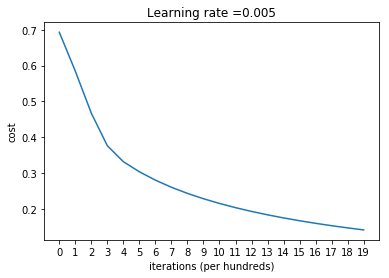

In [90]:
costs = d['costs']
x = [i for i in range(0,20,1)]
plt.plot(costs)
plt.xticks(x)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
训练集准确性:[99.5215311]%
测试集准确性:[92.82296651]%

-------------------------------------------------------

learning rate is: 0.001
训练集准确性:[91.38755981]%
测试集准确性:[92.34449761]%

-------------------------------------------------------

learning rate is: 0.0001
训练集准确性:[71.29186603]%
测试集准确性:[85.64593301]%

-------------------------------------------------------



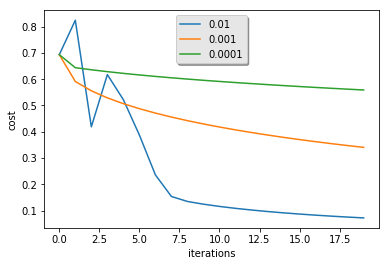

In [92]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_x_std, train_y, test_x_std, test_y, num_iterations = 2000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(models[str(i)]["costs"], label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()